In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('TUANDROMD_chisquare_selected.csv')

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
#mã hóa cột label về 0 và 1 nếu cần 
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [16]:
X = df.drop('Label', axis=1)  

y = df['Label']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 

#Huấn luyện mô hình
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
importances = model.feature_importances_  #Tính độ quan trọng của các đặc trưng từ mô hình đã được huấn luyện
feature_names = X.columns #Lấy tên các đặc trưng
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})#Tạo DataFrame chứa độ quan trọng của các đặc trưng
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) #sắp xếp độ quan trọng 

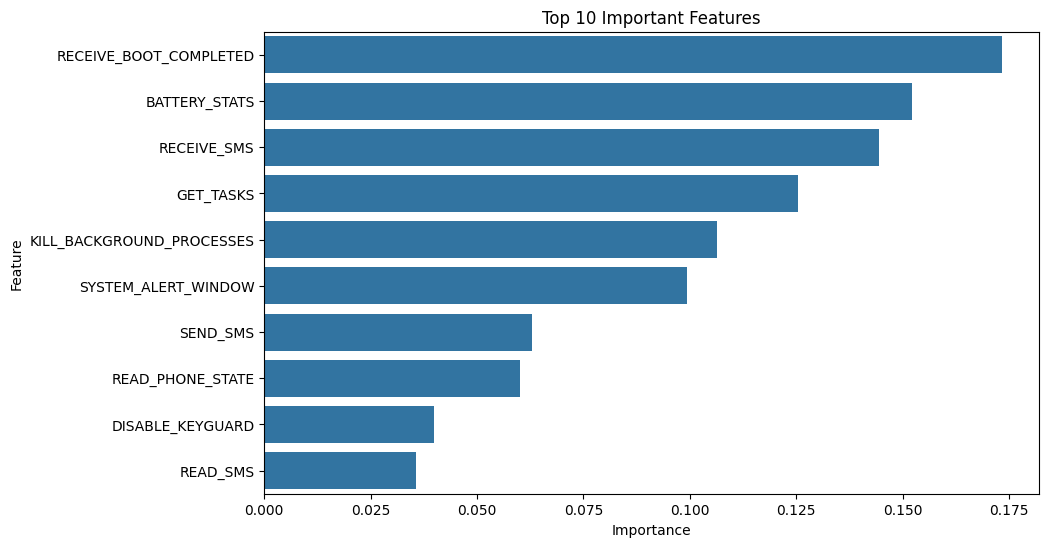

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 10 Important Features')
plt.show() #in biểu đồ

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 89.47%
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       101
           1       0.85      0.69      0.76        32

    accuracy                           0.89       133
   macro avg       0.88      0.82      0.85       133
weighted avg       0.89      0.89      0.89       133



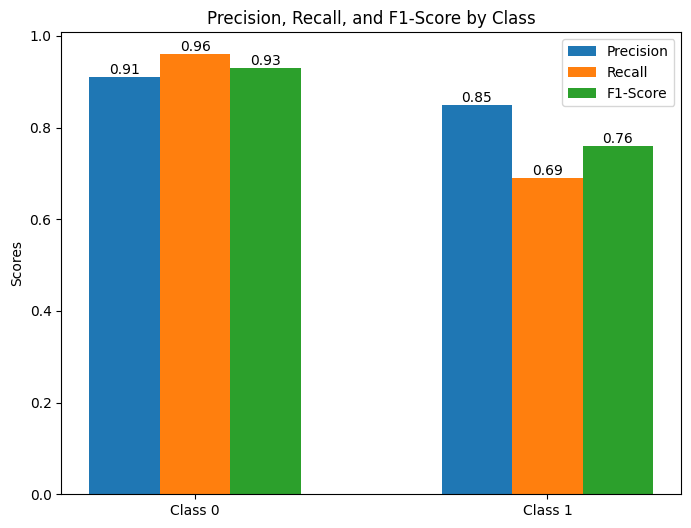

In [21]:
# biểu đồ cột nhóm (grouped bar chart)
# Các chỉ số từ báo cáo phân loại
precision = [0.91, 0.85]
recall = [0.96, 0.69]
f1_score = [0.93, 0.76]
labels = ['Class 0', 'Class 1']

# Vẽ biểu đồ
x = np.arange(len(labels))  # vị trí của các lớp
width = 0.2  # độ rộng của thanh

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Thêm một số nhãn cho biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Thêm giá trị lên trên mỗi thanh
for bar in bars1 + bars2 + bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


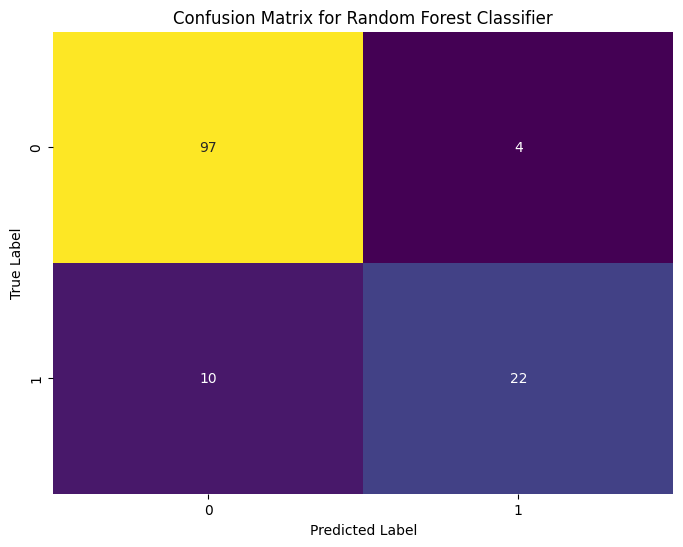

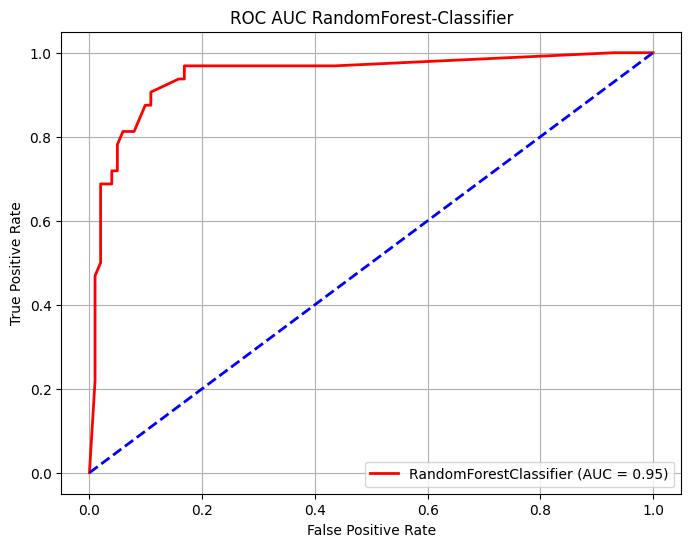

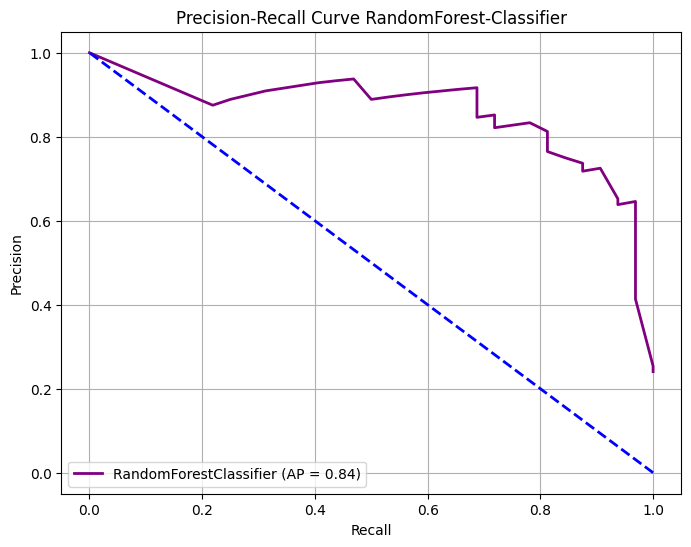

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

#biểu đồ ma trận nhầm lẫn (confusion matrix heatmap)
y_prob = model.predict_proba(X_test)[:, 1] 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Biểu đồ đường cong ROC (Receiver Operating Characteristic curve)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'RandomForestClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC RandomForest-Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#Biểu đồ đường cong Precision-Recall (Precision-Recall curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'RandomForestClassifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve RandomForest-Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

#Tham số này chỉ định cho GridSearchCV biết các tham số nào sẽ được tối
#  ưu hóa và các giá trị nào sẽ được thử nghiệm cho mỗi tham số.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

#Huấn luyện lại mô hình
grid_search.fit(X_train, y_train)

print(f'Tốt nhất: {grid_search.best_params_}')


Tốt nhất: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [24]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']